## DBSCAN

### DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that groups data points into clusters based on their density and proximity. It is a popular algorithm for clustering data in high-dimensional spaces.

DBSCAN is a powerful clustering algorithm that groups together closely packed data points while marking those in low-density regions as outliers. Unlike k-means, DBSCAN can discover clusters of arbitrary shape, making it highly effective for real-world datasets.

### Salient Features

- Density-Based Clustering: Identifies clusters based on the density of data points.
- Arbitrary Shape Clusters: Unlike k-means, DBSCAN can detect clusters of various shapes.
- Noise Handling: Effectively separates noise points from clusters.
- No Need for Predefined Cluster Count: Unlike k-means, DBSCAN does not require specifying the number of clusters beforehand.
- Robust to Outliers: Outliers are naturally excluded from clusters.

### Working Mechanism

DBSCAN works by defining two parameters:
- Epsilon (Eps): The maximum distance between two points for them to be considered neighbors.
- MinPts: The minimum number of points required to form a dense region.

### Algorithm Steps

- Select an arbitrary point.
- Retrieve all points within the Eps distance.
- If the number of points exceeds MinPts, a new cluster is formed.
- Expand the cluster by adding neighboring points.
- Repeat until all points are visited.

### Advantages

- Can find clusters of arbitrary shape.
- Does not require specifying the number of clusters.
- Handles noise and outliers effectively.
- Works well with large datasets.

### Disadvantages

- Struggles with datasets having varying densities.
- Sensitive to parameter selection (Eps and MinPts).
- Border points may belong to multiple clusters.

### Applications

- Geospatial Data Analysis: Identifying regions with high population density.
- Image Segmentation: Grouping pixels based on similarity.
- Anomaly Detection: Detecting fraudulent transactions in financial data.
- Social Network Analysis: Identifying communities in social graphs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

This code creates a synthetic dataset using the make_moons function from scikit-learn. Here's a brief description of the dataset. The make_moons function generates a binary classification dataset that resembles two interleaving half moons. In our case:

- We create 200 samples (n_samples=200)
- We add a small amount of Gaussian noise (noise=0.05) to make the dataset more realistic
- We set random_state=42 for reproducibility

This dataset is particularly useful for demonstrating DBSCAN because:

- It has a non-convex shape that many clustering algorithms (like K-means) would struggle with
- The two clusters are clearly separated but have a complex shape
- The added noise provides a more realistic scenario where some points might be classified as outliers
  
Let's visualize this dataset to better understand its structure

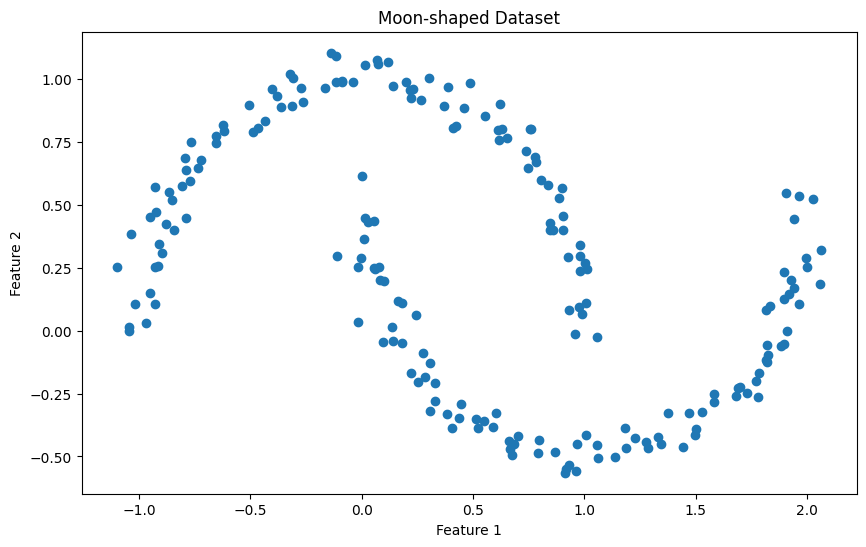

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Determining the epsilon parameter

We use the k-distance graph method to help choose an appropriate epsilon value:

1. We define a function plot_k_distance_graph that calculates the distance to the k-th nearest neighbor for each point.
2. The distances are sorted and plotted.
3. We look for an "elbow" in the resulting graph to choose epsilon.

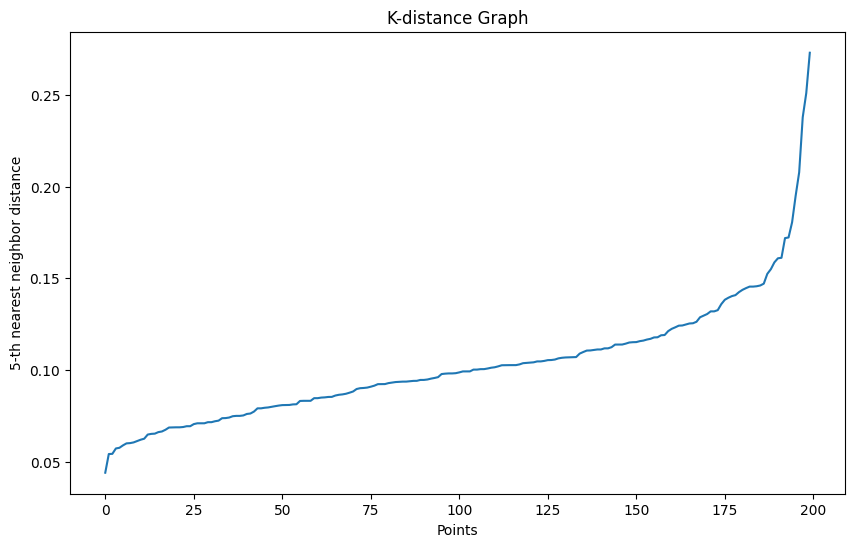

In [4]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X, k=5)

In our example, based on the k-distance graph, we choose an epsilon of 0.15.

### Performing DBSCAN clustering

We use scikit-learn's DBSCAN implementation:

1. We set epsilon=0.15 based on our k-distance graph.
2. We set min_samples=5 (2 * num_features, as our data is 2D).
3. We fit the model to our data and predict the clusters.

In [5]:
# Perform DBSCAN clustering
epsilon = 0.15  # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

### Visualizing the results

We create a scatter plot of our data points, coloring them according to their assigned clusters. Points classified as noise are typically colored differently (often black).

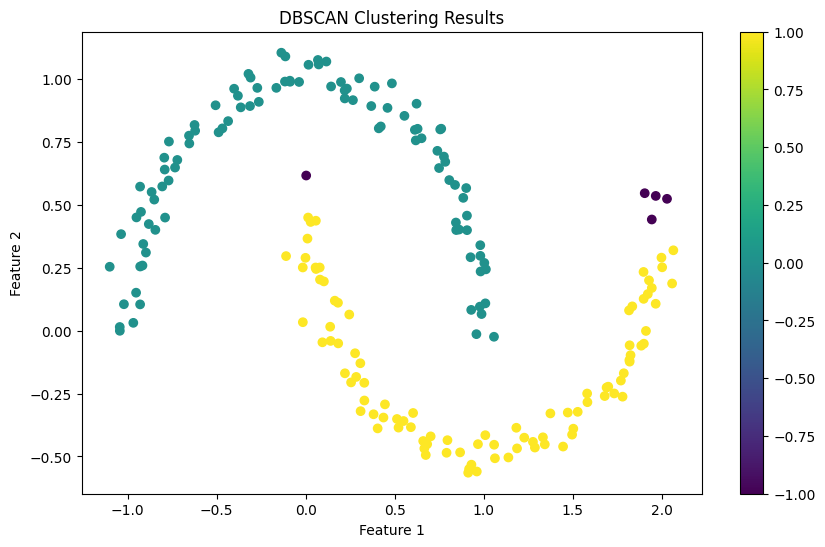

In [6]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Interpreting the results

Finally, we print out the number of clusters found and the number of points classified as noise. This gives us a quick summary of the clustering results.

In [7]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 2
Number of noise points: 5


### Output

Number of clusters: 2

Number of noise points: 5

This implementation provides a complete workflow from data generation to results interpretation. It's important to note that in real-world scenarios, you would replace the sample data generation with loading and preprocessing your actual dataset.


---

# DBSCAN vs OPTICS Clustering

Both **DBSCAN** and **OPTICS** are density-based clustering algorithms. While they share similarities, they differ in their approach to handling clusters and noise.

## Key Differences
| Feature | DBSCAN | OPTICS |
|---------|--------|--------|
| **Cluster Shape** | Finds clusters of arbitrary shape | Finds clusters of arbitrary shape |
| **Parameter Sensitivity** | Requires `Eps` and `MinPts` | Requires `MinPts`, but `Eps` is optional |
| **Handling Varying Densities** | Struggles with varying densities | Handles varying densities better |
| **Noise Identification** | Clearly separates noise points | Noise identification is less explicit |
| **Hierarchical Clustering** | Does not provide hierarchical clustering | Provides hierarchical clustering |
| **Computational Complexity** | Faster for small datasets | Slower but more flexible |

## DBSCAN Overview
DBSCAN groups points based on density:
- **Core Points:** Points with at least `MinPts` neighbors within `Eps`.
- **Border Points:** Points within `Eps` of a core point but with fewer than `MinPts` neighbors.
- **Noise Points:** Points that do not belong to any cluster.

DBSCAN is effective for datasets with well-defined clusters but struggles with varying densities.

## OPTICS Overview
OPTICS extends DBSCAN by:
- Ordering points based on **reachability distance**.
- Allowing clusters to emerge at different density levels.
- Providing a **hierarchical clustering structure**.

OPTICS is more flexible but computationally expensive.

## Example Use Cases
- **DBSCAN:** Ideal for **geospatial clustering**, **image segmentation**, and **anomaly detection**.
- **OPTICS:** Suitable for **customer segmentation**, **biological data analysis**, and **hierarchical clustering**.